<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/time_series_LinearRegression_0510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drive  sample_data


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/2022-04-27\ 데이터

/content/drive/MyDrive/Colab Notebooks/2022-04-27 데이터


In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression # 회귀 모델

In [5]:
s_pred_model = LinearRegression()

In [6]:
data = pd.read_csv('./data/weather_aod_0505_0523_final.csv', encoding='utf-8')
data

,Unnamed: 0,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155516,155516,05-22 23:59:20,21.920166,0.0,0.063679,98.978736,0.0,9.912798,1509.778732,23.579250,0.0
155517,155517,05-22 23:59:30,22.025666,0.0,0.171538,99.084766,0.0,9.914665,1085.456078,23.545740,0.0
155518,155518,05-22 23:59:40,21.930888,0.0,0.092957,99.040640,0.0,9.938890,1305.816996,23.582532,0.0
155519,155519,05-22 23:59:50,22.086412,0.0,0.184221,99.034333,0.0,9.945624,793.150729,23.584564,0.0


In [9]:
n_data = data.drop(data.columns[0], axis=1)
n_data

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
155516,05-22 23:59:20,21.920166,0.0,0.063679,98.978736,0.0,9.912798,1509.778732,23.579250,0.0
155517,05-22 23:59:30,22.025666,0.0,0.171538,99.084766,0.0,9.914665,1085.456078,23.545740,0.0
155518,05-22 23:59:40,21.930888,0.0,0.092957,99.040640,0.0,9.938890,1305.816996,23.582532,0.0
155519,05-22 23:59:50,22.086412,0.0,0.184221,99.034333,0.0,9.945624,793.150729,23.584564,0.0


In [11]:
date_time = n_data.loc[:,'date_time']
date_time

0         05-05 00:00:00
1         05-05 00:00:10
2         05-05 00:00:20
3         05-05 00:00:30
4         05-05 00:00:40
               ...      
155516    05-22 23:59:20
155517    05-22 23:59:30
155518    05-22 23:59:40
155519    05-22 23:59:50
155520    05-23 00:00:00
Name: date_time, Length: 155521, dtype: object

In [17]:
date = []
for i in range(43200):
  date.append(date_time[i][6:])

date[0]

'00:00:00'

In [21]:
for i in range(43200):
  date[i] = date[i].replace(":","")
date

['000000',
 '000010',
 '000020',
 '000030',
 '000040',
 '000050',
 '000100',
 '000110',
 '000120',
 '000130',
 '000140',
 '000150',
 '000200',
 '000210',
 '000220',
 '000230',
 '000240',
 '000250',
 '000300',
 '000310',
 '000320',
 '000330',
 '000340',
 '000350',
 '000400',
 '000410',
 '000420',
 '000430',
 '000440',
 '000450',
 '000500',
 '000510',
 '000520',
 '000530',
 '000540',
 '000550',
 '000600',
 '000610',
 '000620',
 '000630',
 '000640',
 '000650',
 '000700',
 '000710',
 '000720',
 '000730',
 '000740',
 '000750',
 '000800',
 '000810',
 '000820',
 '000830',
 '000840',
 '000850',
 '000900',
 '000910',
 '000920',
 '000930',
 '000940',
 '000950',
 '001000',
 '001010',
 '001020',
 '001030',
 '001040',
 '001050',
 '001100',
 '001110',
 '001120',
 '001130',
 '001140',
 '001150',
 '001200',
 '001210',
 '001220',
 '001230',
 '001240',
 '001250',
 '001300',
 '001310',
 '001320',
 '001330',
 '001340',
 '001350',
 '001400',
 '001410',
 '001420',
 '001430',
 '001440',
 '001450',
 '001500',

In [56]:
Date = pd.DataFrame(date)
Date

,0
0,000000
1,000010
2,000020
3,000030
4,000040
...,...
43195,235910
43196,235920
43197,235930
43198,235940


In [41]:
new_data = n_data.iloc[:43200, :]
new_data

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
43195,05-09 23:59:10,24.128553,0.0,1.268276,88.508980,0.0,6.734175,936.222123,26.227371,0.0
43196,05-09 23:59:20,24.073217,0.0,1.284951,89.005958,0.0,4.471558,882.632247,26.128100,0.0
43197,05-09 23:59:30,24.181822,0.0,1.317443,91.923205,0.0,2.536581,905.367195,26.246212,0.0
43198,05-09 23:59:40,23.765830,0.0,1.350209,89.787909,0.0,7.882563,908.718558,26.224739,0.0


In [43]:
concat_data = pd.concat([Date, new_data], axis=1)

In [46]:
concat_drop_data = concat_data.drop(concat_data.columns[1], axis=1)

In [47]:
concat_drop_data

,0,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,000000,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,000010,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,000020,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,000030,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,000040,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
43195,235910,24.128553,0.0,1.268276,88.508980,0.0,6.734175,936.222123,26.227371,0.0
43196,235920,24.073217,0.0,1.284951,89.005958,0.0,4.471558,882.632247,26.128100,0.0
43197,235930,24.181822,0.0,1.317443,91.923205,0.0,2.536581,905.367195,26.246212,0.0
43198,235940,23.765830,0.0,1.350209,89.787909,0.0,7.882563,908.718558,26.224739,0.0


In [57]:
X = concat_drop_data[[0, 'temperature', 'precipitation', 'wind_speed', 'humidity', 'radiation', 'total_cloudiness', 'visibility', 'ground_temp']]
y = concat_drop_data['aod']

In [59]:
X

,0,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
0,000000,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114
1,000010,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559
2,000020,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335
3,000030,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727
4,000040,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515
...,...,...,...,...,...,...,...,...,...
43195,235910,24.128553,0.0,1.268276,88.508980,0.0,6.734175,936.222123,26.227371
43196,235920,24.073217,0.0,1.284951,89.005958,0.0,4.471558,882.632247,26.128100
43197,235930,24.181822,0.0,1.317443,91.923205,0.0,2.536581,905.367195,26.246212
43198,235940,23.765830,0.0,1.350209,89.787909,0.0,7.882563,908.718558,26.224739


In [63]:
X_train = np.array(X)
X_train

array([['000000', 20.56176729, 0.0, ..., 4.624747582, 2000.017467,
        21.48911358],
       ['000010', 20.56954325, 0.0, ..., 1.546086228, 1999.916159,
        21.53555913],
       ['000020', 20.55241867, 0.0, ..., 4.227161941, 2000.068799,
        21.54233467],
       ...,
       ['235930', 24.18182204, 0.0, ..., 2.53658129, 905.3671948,
        26.24621173],
       ['235940', 23.76582951, 0.0, ..., 7.882563079, 908.7185582,
        26.22473944],
       ['235950', 24.01369698, 0.0, ..., 2.849745754, 874.7592022,
        26.42776813]], dtype=object)

In [64]:
X_train.shape

(43200, 9)

In [66]:
y_train = np.array(y)
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
s_pred_model.fit(X_train, y_train)  # 지도학습 방법 (회귀)

LinearRegression()

In [80]:
x = n_data.iloc[43201:51841, :]
x.to_csv('./data/test_date_0510.csv')

In [87]:
t_x = pd.read_csv('./data/test_date_0510.csv', encoding='utf-8')
te_data = t_x.drop(t_x.columns[0], axis=1)
te_data

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-10 00:00:10,23.519452,0.0,1.310542,93.448138,0.0,2.834842,579.572541,25.795761,0.0
1,05-10 00:00:20,23.508534,0.0,1.216460,94.046252,0.0,2.987066,779.503087,25.649180,0.0
2,05-10 00:00:30,23.578539,0.0,1.231530,93.088839,0.0,4.588290,839.536659,25.764901,0.0
3,05-10 00:00:40,23.511267,0.0,1.363065,93.508996,0.0,3.150468,785.059104,25.594288,0.0
4,05-10 00:00:50,23.532836,0.0,1.344288,93.949809,0.0,1.337196,682.372543,25.509988,0.0
...,...,...,...,...,...,...,...,...,...,...
8635,05-10 23:59:20,23.119093,0.0,0.545134,98.924287,0.0,0.000000,2000.057446,23.771400,0.0
8636,05-10 23:59:30,23.177551,0.0,0.547382,99.022362,0.0,0.000000,2000.062407,23.854596,0.0
8637,05-10 23:59:40,22.989495,0.0,0.543354,99.049267,0.0,0.000000,2000.038003,23.720764,0.0
8638,05-10 23:59:50,23.107544,0.0,0.540677,99.051598,0.0,0.000000,2000.079637,23.891444,0.0


In [88]:
te_date = te_data.loc[:, 'date_time']
te_date

0       05-10 00:00:10
1       05-10 00:00:20
2       05-10 00:00:30
3       05-10 00:00:40
4       05-10 00:00:50
             ...      
8635    05-10 23:59:20
8636    05-10 23:59:30
8637    05-10 23:59:40
8638    05-10 23:59:50
8639    05-11 00:00:00
Name: date_time, Length: 8640, dtype: object

In [93]:
t_datetime = []
for i in range(8640):
  t_datetime.append(te_date[i][6:])

t_datetime[0]

'00:00:10'

In [94]:
for i in range(8640):
  t_datetime[i] = t_datetime[i].replace(":","")
t_datetime

['000010',
 '000020',
 '000030',
 '000040',
 '000050',
 '000100',
 '000110',
 '000120',
 '000130',
 '000140',
 '000150',
 '000200',
 '000210',
 '000220',
 '000230',
 '000240',
 '000250',
 '000300',
 '000310',
 '000320',
 '000330',
 '000340',
 '000350',
 '000400',
 '000410',
 '000420',
 '000430',
 '000440',
 '000450',
 '000500',
 '000510',
 '000520',
 '000530',
 '000540',
 '000550',
 '000600',
 '000610',
 '000620',
 '000630',
 '000640',
 '000650',
 '000700',
 '000710',
 '000720',
 '000730',
 '000740',
 '000750',
 '000800',
 '000810',
 '000820',
 '000830',
 '000840',
 '000850',
 '000900',
 '000910',
 '000920',
 '000930',
 '000940',
 '000950',
 '001000',
 '001010',
 '001020',
 '001030',
 '001040',
 '001050',
 '001100',
 '001110',
 '001120',
 '001130',
 '001140',
 '001150',
 '001200',
 '001210',
 '001220',
 '001230',
 '001240',
 '001250',
 '001300',
 '001310',
 '001320',
 '001330',
 '001340',
 '001350',
 '001400',
 '001410',
 '001420',
 '001430',
 '001440',
 '001450',
 '001500',
 '001510',

In [96]:
t_datetime = pd.DataFrame(t_datetime)

In [97]:
t_concat = pd.concat([t_datetime, t_x], axis=1)
t_concat

,0,Unnamed: 0,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,000010,43201,05-10 00:00:10,23.519452,0.0,1.310542,93.448138,0.0,2.834842,579.572541,25.795761,0.0
1,000020,43202,05-10 00:00:20,23.508534,0.0,1.216460,94.046252,0.0,2.987066,779.503087,25.649180,0.0
2,000030,43203,05-10 00:00:30,23.578539,0.0,1.231530,93.088839,0.0,4.588290,839.536659,25.764901,0.0
3,000040,43204,05-10 00:00:40,23.511267,0.0,1.363065,93.508996,0.0,3.150468,785.059104,25.594288,0.0
4,000050,43205,05-10 00:00:50,23.532836,0.0,1.344288,93.949809,0.0,1.337196,682.372543,25.509988,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8635,235920,51836,05-10 23:59:20,23.119093,0.0,0.545134,98.924287,0.0,0.000000,2000.057446,23.771400,0.0
8636,235930,51837,05-10 23:59:30,23.177551,0.0,0.547382,99.022362,0.0,0.000000,2000.062407,23.854596,0.0
8637,235940,51838,05-10 23:59:40,22.989495,0.0,0.543354,99.049267,0.0,0.000000,2000.038003,23.720764,0.0
8638,235950,51839,05-10 23:59:50,23.107544,0.0,0.540677,99.051598,0.0,0.000000,2000.079637,23.891444,0.0


In [99]:
t_concat = t_concat.drop(t_concat.columns[1], axis=1)
t_concat

,0,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,000010,23.519452,0.0,1.310542,93.448138,0.0,2.834842,579.572541,25.795761,0.0
1,000020,23.508534,0.0,1.216460,94.046252,0.0,2.987066,779.503087,25.649180,0.0
2,000030,23.578539,0.0,1.231530,93.088839,0.0,4.588290,839.536659,25.764901,0.0
3,000040,23.511267,0.0,1.363065,93.508996,0.0,3.150468,785.059104,25.594288,0.0
4,000050,23.532836,0.0,1.344288,93.949809,0.0,1.337196,682.372543,25.509988,0.0
...,...,...,...,...,...,...,...,...,...,...
8635,235920,23.119093,0.0,0.545134,98.924287,0.0,0.000000,2000.057446,23.771400,0.0
8636,235930,23.177551,0.0,0.547382,99.022362,0.0,0.000000,2000.062407,23.854596,0.0
8637,235940,22.989495,0.0,0.543354,99.049267,0.0,0.000000,2000.038003,23.720764,0.0
8638,235950,23.107544,0.0,0.540677,99.051598,0.0,0.000000,2000.079637,23.891444,0.0


In [101]:
x = t_concat.iloc[:, :9]
x

,0,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
0,000010,23.519452,0.0,1.310542,93.448138,0.0,2.834842,579.572541,25.795761
1,000020,23.508534,0.0,1.216460,94.046252,0.0,2.987066,779.503087,25.649180
2,000030,23.578539,0.0,1.231530,93.088839,0.0,4.588290,839.536659,25.764901
3,000040,23.511267,0.0,1.363065,93.508996,0.0,3.150468,785.059104,25.594288
4,000050,23.532836,0.0,1.344288,93.949809,0.0,1.337196,682.372543,25.509988
...,...,...,...,...,...,...,...,...,...
8635,235920,23.119093,0.0,0.545134,98.924287,0.0,0.000000,2000.057446,23.771400
8636,235930,23.177551,0.0,0.547382,99.022362,0.0,0.000000,2000.062407,23.854596
8637,235940,22.989495,0.0,0.543354,99.049267,0.0,0.000000,2000.038003,23.720764
8638,235950,23.107544,0.0,0.540677,99.051598,0.0,0.000000,2000.079637,23.891444


In [102]:
X_test = np.array(x)
X_test

array([['000010', 23.51945182, 0.0, ..., 2.834841967, 579.5725414,
        25.79576141],
       ['000020', 23.50853351, 0.0, ..., 2.98706591, 779.5030875,
        25.64917981],
       ['000030', 23.57853929, 0.0, ..., 4.588290046, 839.536659,
        25.76490129],
       ...,
       ['235940', 22.98949537, 0.0, ..., 0.0, 2000.038003, 23.72076435],
       ['235950', 23.10754423, 0.0, ..., 0.0, 2000.079637, 23.89144389],
       ['000000', 22.92060497, 0.0, ..., 0.0, 1999.912642, 23.71341828]],
      dtype=object)

In [103]:
s_pre = s_pred_model.predict(X_test)

In [105]:
test_y = t_concat.loc[:,'aod']
test_y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8635    0.0
8636    0.0
8637    0.0
8638    0.0
8639    0.0
Name: aod, Length: 8640, dtype: float64

In [106]:
y_test = np.array(test_y)
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [108]:
import matplotlib.pyplot as plt

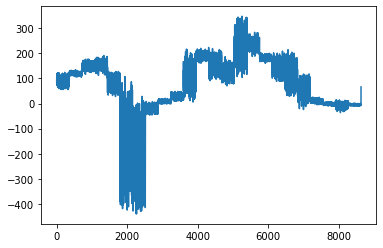

In [109]:
plt.plot(s_pre)

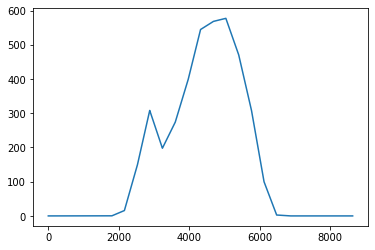

In [110]:
plt.plot(y_test)